# Proyek Analisis Data: bike-sharing-dataset
- **Nama:** Fajar Satria Wiguna
- **Email:** fajarsatria991@gmail.com
- **ID Dicoding:** fajarwiguna

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda berdasarkan bulan?
- Bagaimana pengaruh kondisi cuaca (weathersit, suhu, kelembaban, kecepatan angin) terhadap jumlah - peminjaman sepeda?
- Bagaimana perbandingan jumlah peminjaman antara pengguna kasual dan pengguna terdaftar?
- Apakah pengguna kasual lebih sering menggunakan sepeda pada akhir pekan dibandingkan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
bikes_per_hour_df = pd.read_csv('data/hour.csv')
bikes_per_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Dataset hour.csv berisi data peminjaman sepeda per jam, termasuk tanggal, musim, suhu, kelembaban, kecepatan angin, dan jumlah total peminjaman.

In [6]:
bikes_per_day_df = pd.read_csv('data/day.csv')
bikes_per_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Dataset day.csv mirip dengan hour.csv, tetapi hanya mencatat data harian tanpa informasi per jam.

### Assessing Data

**Tabel hour.csv**

In [7]:
bikes_per_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**insight:**
Data diatas sudah aman karena tidak ada missing value nya, tetapi kolom dtday masih bersifat objek dan akan kita ubah ke datetime

In [8]:
print("Missing values in hour dataset:")
print(bikes_per_hour_df.isna().sum())
print("Duplicate values in hour dataset:", bikes_per_hour_df.duplicated().sum())

Missing values in hour dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate values in hour dataset: 0


**Insight:**
Dataset sudah aman tidak ada missing value dan duplikasi

**Tabel day.csv**

In [9]:
bikes_per_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
print("Missing values in day dataset:")
print(bikes_per_day_df.isna().sum())
print("Duplicate values in day dataset:", bikes_per_day_df.duplicated().sum())

Missing values in day dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate values in day dataset: 0


**Insight:**
- Sama seperti hour.csv, kolom dteday perlu dikonversi ke format datetime.
- Tidak ada missing values atau duplikasi dalam day.csv.

### Cleaning Data

**Mengubah tipe data dteday menjadi datetime pada tabel day.csv**

In [11]:
bikes_per_hour_df['dteday'] = pd.to_datetime(bikes_per_hour_df['dteday'])
bikes_per_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [12]:
bikes_per_day_df['dteday'] = pd.to_datetime(bikes_per_day_df['dteday'])
bikes_per_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- kolom dtday pada kedua tabel sudah kita ubah ke format datetime

## Exploratory Data Analysis (EDA)

### Analisis Tren Peminjaman Sepeda Berdasarkan Bulan dan musim

In [13]:
bikes_per_day_df['year_month'] = bikes_per_day_df['dteday'].dt.to_period('M')
monthly_trend = bikes_per_day_df.groupby('year_month')['cnt'].sum()
print(monthly_trend)


year_month
2011-01     38189
2011-02     48215
2011-03     64045
2011-04     94870
2011-05    135821
2011-06    143512
2011-07    141341
2011-08    136691
2011-09    127418
2011-10    123511
2011-11    102167
2011-12     87323
2012-01     96744
2012-02    103137
2012-03    164875
2012-04    174224
2012-05    195865
2012-06    202830
2012-07    203607
2012-08    214503
2012-09    218573
2012-10    198841
2012-11    152664
2012-12    123713
Freq: M, Name: cnt, dtype: int64


**Insight:**
- Peminjaman mulai meningkat dari Maret, mencapai puncaknya antara Juni - September.
- Peminjaman mulai menurun setelah Oktober hingga titik terendah di Desember - Januari.

In [14]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
bikes_per_day_df["season_name"] = bikes_per_day_df["season"].map(season_mapping)

seasonal_usage = bikes_per_day_df.groupby("season_name")[["cnt", "casual", "registered"]].sum()
seasonal_usage = seasonal_usage.sort_values(by="cnt", ascending=False)
print(seasonal_usage)


                 cnt  casual  registered
season_name                             
Fall         1061129  226091      835038
Summer        918589  203522      715067
Winter        841613  129782      711831
Spring        471348   60622      410726


**Insight:**
- Peminjaman tertinggi terjadi pada musim Fall (Gugur).
- Pengguna kasual lebih banyak meminjam di Summer dan Fall.

### Analisis Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda

In [15]:
weather_corr = bikes_per_day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
print(weather_corr)

               temp       hum  windspeed       cnt
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
cnt        0.627494 -0.100659  -0.234545  1.000000


**Insight:**
- **Suhu (temp)** berkorelasi positif tinggi (0.63) terhadap jumlah peminjaman sepeda.
- **Kecepatan angin (windspeed)** berkorelasi negatif (-0.23), artinya angin kencang mengurangi jumlah peminjaman.
- **Kelembaban (hum)** tidak memiliki pengaruh yang signifikan.

### Analisis Perbandingan Pengguna Kasual dan Terdaftar

In [16]:
user_type_usage = bikes_per_day_df[['casual', 'registered']].sum()
print(user_type_usage)


casual         620017
registered    2672662
dtype: int64


**Insight:**
- Pengguna terdaftar meminjam sepeda lebih banyak dibandingkan pengguna kasual.

### Analisis Kebiasaan Pengguna Kasual Sepeda pada Akhir Pekan

In [17]:
casual_weekday = bikes_per_day_df.groupby("weekday")["casual"].sum()
print(casual_weekday)

weekday
0    140521
1     70784
2     57843
3     57319
4     61460
5     78238
6    153852
Name: casual, dtype: int64


**Insight:**
- Pengguna **kasual lebih sering meminjam sepeda pada akhir pekan**, terutama pada akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola peminjaman sepeda berdasarkan bulan dan musim?

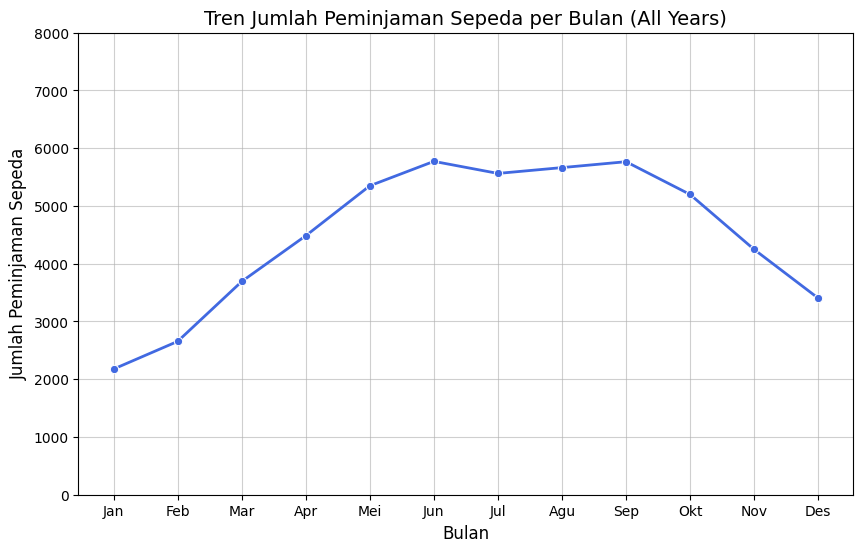

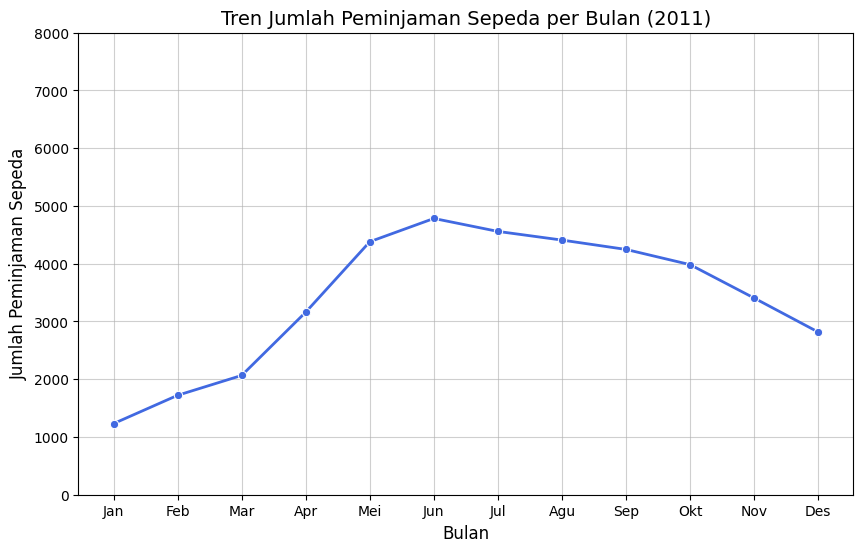

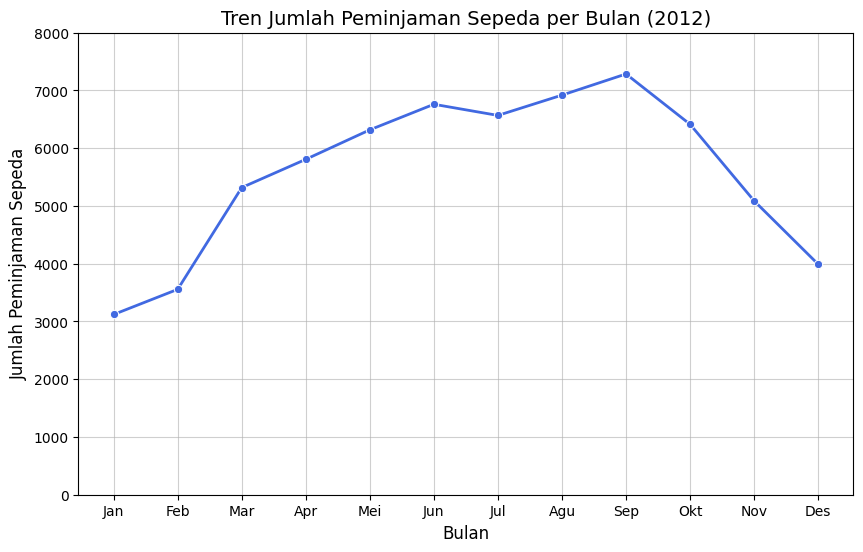

In [18]:
def plot_monthly_trend(df, year=None):
    year_mapping = {0: "2011", 1: "2012"}
    
    if year is not None:
        df = df[df["yr"] == year]
    
    monthly_trend = df.groupby(df['dteday'].dt.month)['cnt'].mean()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker="o", linewidth=2, color="royalblue")

    title = "Tren Jumlah Peminjaman Sepeda per Bulan"
    if year in year_mapping:
        title += f" ({year_mapping[year]})"
    else:
        title += " (All Years)"
    
    plt.title(title, fontsize=14)
    plt.xlabel("Bulan", fontsize=12)
    plt.ylabel("Jumlah Peminjaman Sepeda", fontsize=12)
    plt.ylim(0, 8000)
    plt.xticks(ticks=range(1, 13), labels=[
        "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
    
    plt.grid(True, alpha=0.6)
    plt.show()

# Plot untuk All Years, 2011, dan 2012
plot_monthly_trend(bikes_per_day_df)
plot_monthly_trend(bikes_per_day_df, year=0)
plot_monthly_trend(bikes_per_day_df, year=1)


**Insight:**
- Pada 2011, peminjaman naik signifikan dari Maret hingga Juni sebelum mulai menurun.  
- Pada 2012, tren serupa terjadi dengan peningkatan dari April hingga September.  
- Secara umum, peminjaman lebih sering terjadi pada pertengahan hingga akhir tahun dibanding awal tahun.

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_21668\492037574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_usage.index, y=seasonal_usage.values, palette="coolwarm")


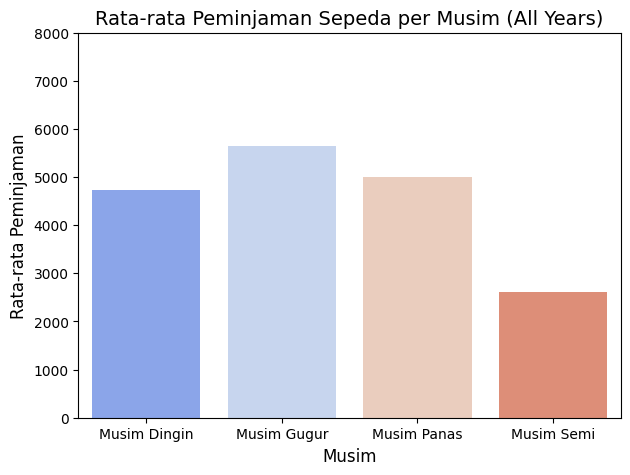

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_21668\492037574.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["season_label"] = df["season"].map(season_labels)
C:\Users\ADVAN\AppData\Local\Temp\ipykernel_21668\492037574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_usage.index, y=seasonal_usage.values, palette="coolwarm")


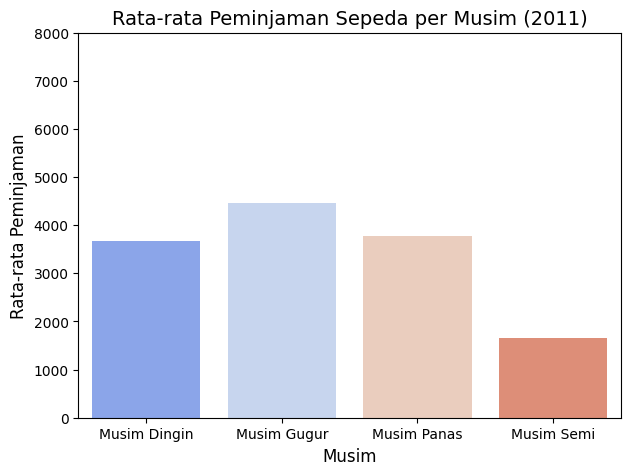

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_21668\492037574.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["season_label"] = df["season"].map(season_labels)
C:\Users\ADVAN\AppData\Local\Temp\ipykernel_21668\492037574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_usage.index, y=seasonal_usage.values, palette="coolwarm")


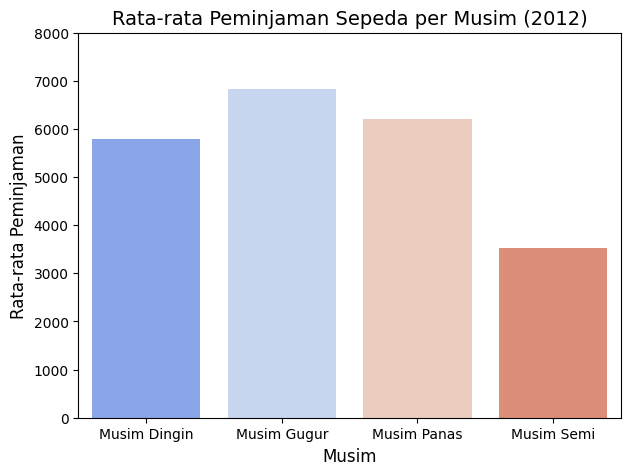

In [ ]:
season_labels = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}

def plot_seasonal_usage(df, year=None):
    year_mapping = {0: "2011", 1: "2012"}
    
    if year is not None:
        df = df[df["yr"] == year]

    df["season_label"] = df["season"].map(season_labels)
    seasonal_usage = df.groupby("season_label")["cnt"].mean()

    plt.figure(figsize=(7, 5))
    sns.barplot(x=seasonal_usage.index, y=seasonal_usage.values, palette="coolwarm")

    plt.xlabel("Musim", fontsize=12)
    plt.ylabel("Rata-rata Peminjaman", fontsize=12)
    plt.ylim(0, 8000)  

    title = "Rata-rata Peminjaman Sepeda per Musim"
    if year in year_mapping:
        title += f" ({year_mapping[year]})"
    else:
        title += " (All Years)"
    
    plt.title(title, fontsize=14)
    plt.show()

# Plot untuk All Years, 2011, dan 2012
plot_seasonal_usage(bikes_per_day_df)
plot_seasonal_usage(bikes_per_day_df, year=0)
plot_seasonal_usage(bikes_per_day_df, year=1)


**Insight:**
- **Musim gugur** memiliki jumlah peminjaman tertinggi, terutama oleh pengguna kasual.
- **Musim dingin** memiliki peminjaman paling sedikit.

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap peminjaman sepeda?

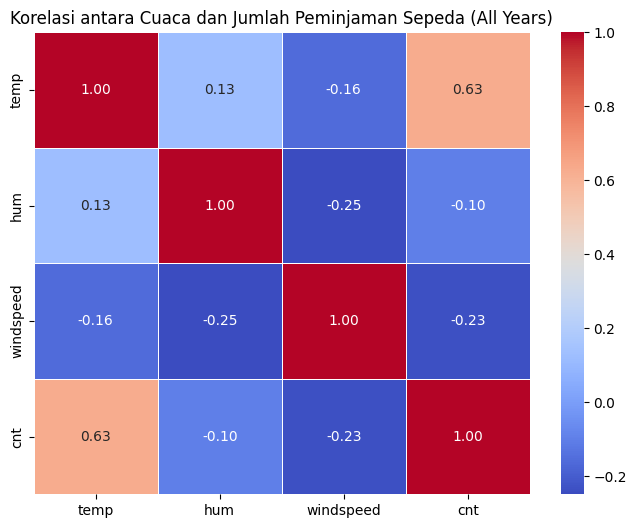

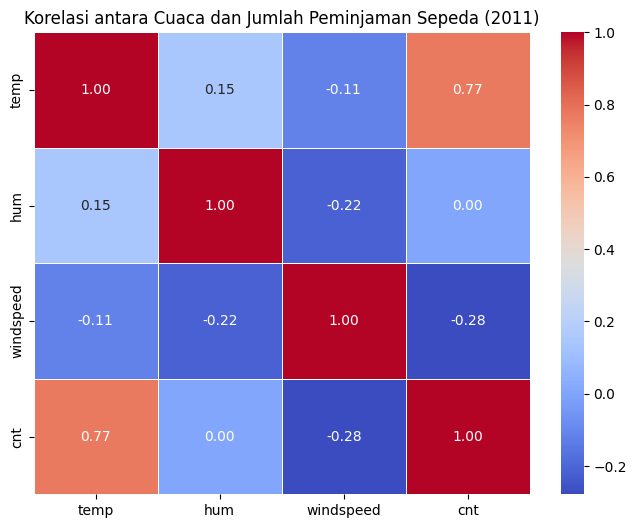

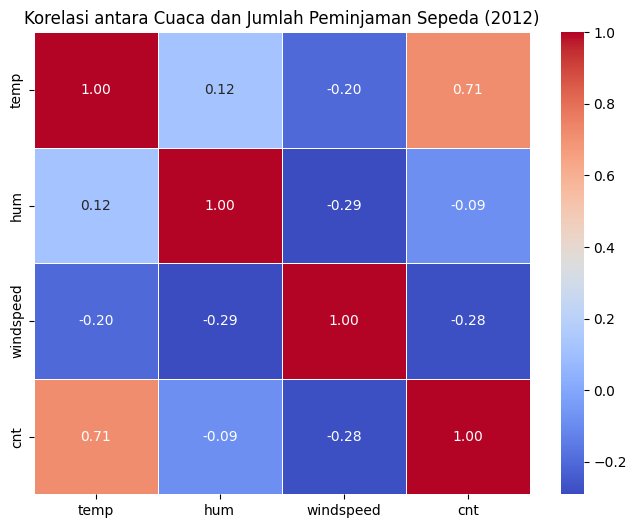

In [20]:
# Fungsi untuk plot heatmap korelasi dengan year mapping di judul
def plot_weather_corr(df, year=None):
    year_mapping = {0: "2011", 1: "2012"}
    
    if year is not None:
        df = df[df["yr"] == year]

    weather_corr = df[['temp', 'hum', 'windspeed', 'cnt']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(weather_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

    title = "Korelasi antara Cuaca dan Jumlah Peminjaman Sepeda"
    if year in year_mapping:
        title += f" ({year_mapping[year]})"
    else:
        title += " (All Years)"
    
    plt.title(title)
    plt.show()

# Plot untuk All Years, 2011, dan 2012
plot_weather_corr(bikes_per_day_df)
plot_weather_corr(bikes_per_day_df, year=0)
plot_weather_corr(bikes_per_day_df, year=1)


**Insight:**
- **Suhu (temp)** Suhu memiliki korelasi positif dengan jumlah peminjaman (semakin panas, semakin banyak yang meminjam).
- **Kecepatan angin (windspeed)** memiliki korelasi negatif (cuaca berangin & lembab cenderung menurunkan peminjaman).

### Pertanyaan 3: Bagaimana perbandingan jumlah peminjaman antara pengguna kasual dan pengguna terdaftar?

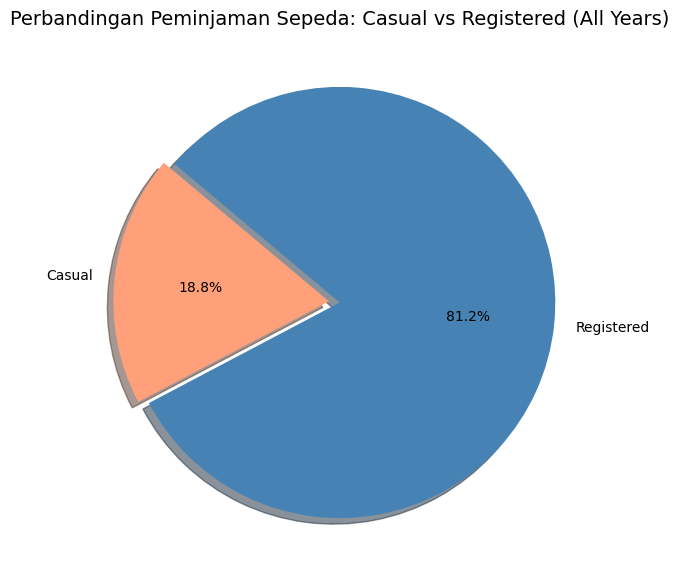

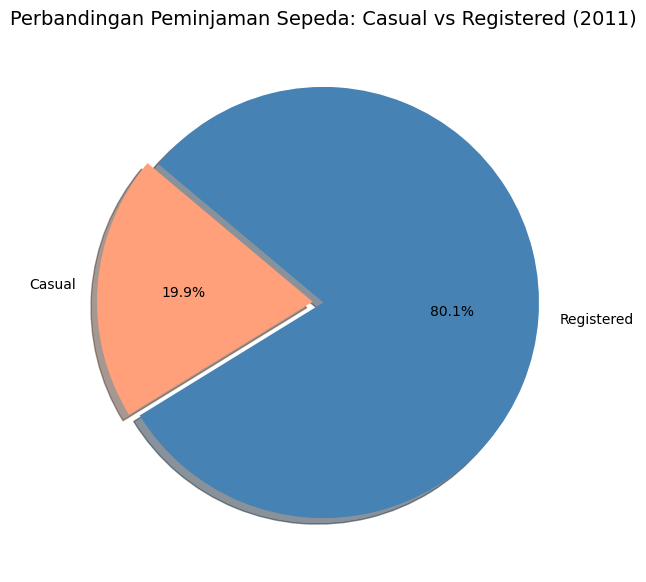

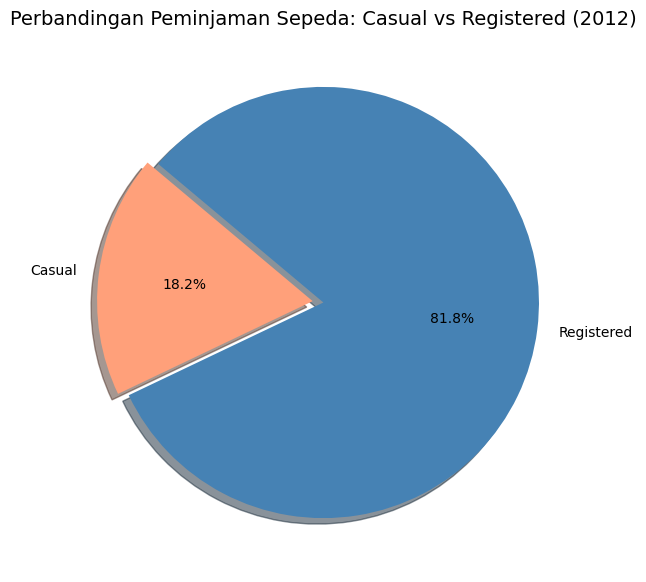

In [24]:
# Fungsi untuk plot pie chart pengguna kasual vs terdaftar
def plot_user_type_pie(df, year=None):
    year_mapping = {0: "2011", 1: "2012"}
    
    if year is not None:
        df = df[df["yr"] == year]

    user_type_usage = df[['casual', 'registered']].sum()
    
    plt.figure(figsize=(7, 7))
    colors = ["#FFA07A", "#4682B4"]
    plt.pie(user_type_usage, labels=["Casual", "Registered"], autopct='%1.1f%%', 
            colors=colors, startangle=140, explode=(0.05, 0), shadow=True)

    title = "Perbandingan Peminjaman Sepeda: Casual vs Registered"
    if year in year_mapping:
        title += f" ({year_mapping[year]})"
    else:
        title += " (All Years)"
    
    plt.title(title, fontsize=14)
    plt.show()

# Plot untuk All Years, 2011, dan 2012
plot_user_type_pie(bikes_per_day_df)
plot_user_type_pie(bikes_per_day_df, year=0)
plot_user_type_pie(bikes_per_day_df, year=1)


**Insight:**
- Jumlah peminjaman oleh pengguna terdaftar (registered) jauh lebih tinggi dibandingkan pengguna kasual (casual).
- Pengguna terdaftar meminjam sepeda lebih dari 4 kali lipat dibanding pengguna kasual.
- Hal ini menunjukkan bahwa layanan peminjaman sepeda lebih banyak digunakan oleh pelanggan tetap dibanding pengguna sesekali.

### Pertanyaan 4: Apakah pengguna kasual lebih sering menggunakan sepeda pada akhir pekan dibandingkan hari kerja?

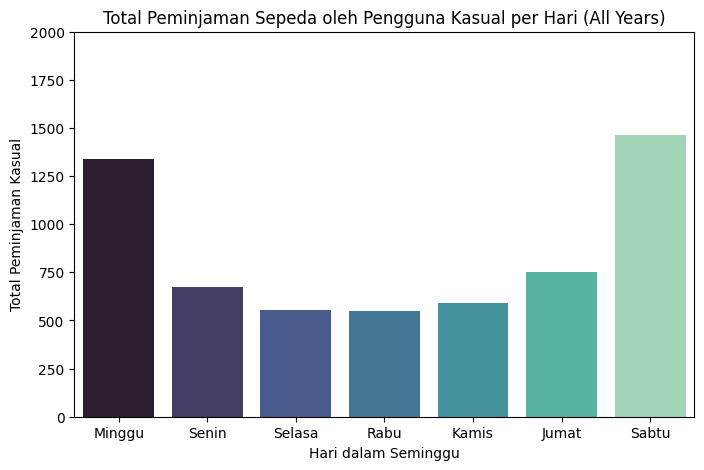

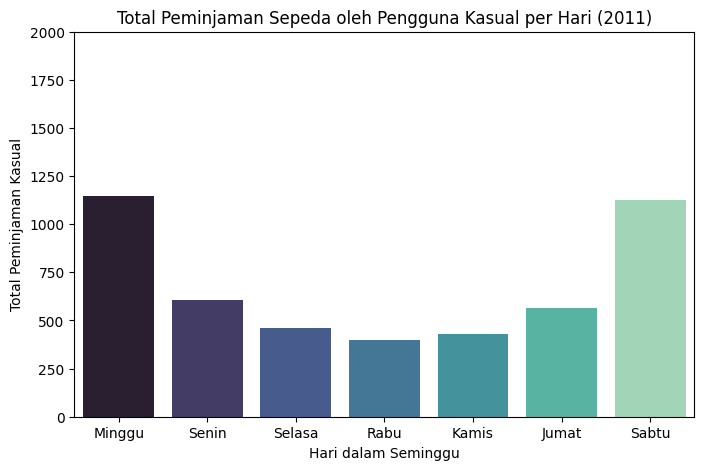

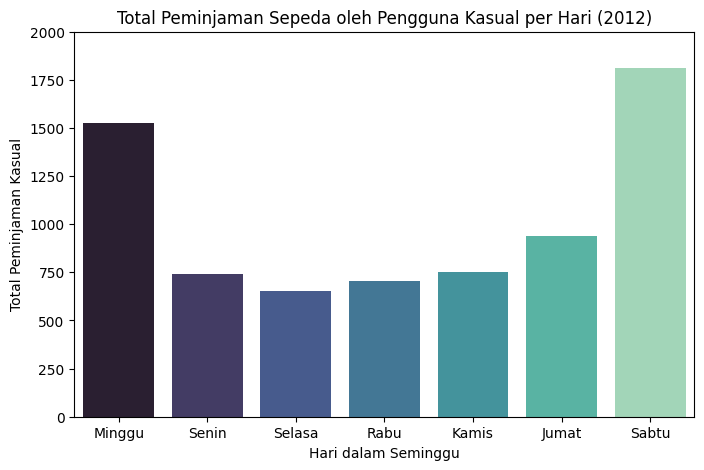

In [25]:
# Fungsi untuk plot peminjaman kasual per hari
def plot_casual_weekday(df, year=None):
    year_mapping = {0: "2011", 1: "2012"}
    
    if year is not None:
        df = df[df["yr"] == year]

    casual_weekday = df.groupby("weekday")["casual"].mean()
    day_labels = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=day_labels, y=casual_weekday.values, hue=day_labels, palette="mako", dodge=False, legend=False)
    
    plt.xlabel("Hari dalam Seminggu")
    plt.ylabel("Total Peminjaman Kasual")
    plt.ylim(0, 2000)
    
    title = "Total Peminjaman Sepeda oleh Pengguna Kasual per Hari"
    if year in year_mapping:
        title += f" ({year_mapping[year]})"
    else:
        title += " (All Years)"

    plt.title(title)
    plt.xticks(rotation=0)
    plt.show()

# Plot untuk All Years, 2011, dan 2012
plot_casual_weekday(bikes_per_day_df)
plot_casual_weekday(bikes_per_day_df, year=0)
plot_casual_weekday(bikes_per_day_df, year=1)


**Insight:**
- Pengguna kasual lebih sering menggunakan sepeda pada akhir pekan dibandingkan hari kerja.
- Peningkatan signifikan terlihat terutama pada hari ke-0 dan ke-6, yang menunjukkan bahwa mereka lebih memilih bersepeda sebagai aktivitas rekreasi saat libur.
- Hari kerja memiliki jumlah peminjaman yang lebih rendah dan merata, menunjukkan bahwa sepeda kemungkinan kurang digunakan untuk keperluan komuter oleh pengguna kasual.

## Conclusion

Berdasarkan hasil analisis data peminjaman sepeda, berikut adalah kesimpulan utama:

1. **Tren Peminjaman Sepeda Berdasarkan Bulan dan Musim**  
   - Pada 2011, peminjaman naik signifikan dari Maret hingga Juni sebelum mulai menurun.  
   - Pada 2012, tren serupa terjadi dengan peningkatan dari April hingga September.  
   - Secara umum, peminjaman lebih sering terjadi pada pertengahan hingga akhir tahun dibanding awal tahun.

2. **Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda**  
   - **Suhu (temp)** memiliki korelasi positif terhadap peminjaman sepeda, artinya semakin hangat suhu, semakin tinggi peminjamannya.  
   - **Kelembaban (hum)** memiliki korelasi yang sangat lemah, sehingga tidak terlalu berpengaruh terhadap keputusan pengguna dalam meminjam sepeda.  
   - **Kecepatan angin (windspeed)** memiliki korelasi negatif terhadap peminjaman, menunjukkan bahwa angin kencang cenderung mengurangi jumlah peminjaman sepeda.  

3. **Perbandingan Pengguna Kasual dan Pengguna Terdaftar**  
   - Pengguna **terdaftar (registered)** jauh lebih sering meminjam sepeda dibandingkan pengguna **kasual (casual)**.  
   - Jumlah peminjaman pengguna terdaftar lebih dari **4 kali lipat** dibandingkan pengguna kasual.  
   - Hal ini menunjukkan bahwa mayoritas pengguna adalah pelanggan tetap yang memanfaatkan layanan ini secara rutin.  

4. **Kebiasaan Pengguna Kasual pada Akhir Pekan**  
   - Pengguna kasual lebih sering meminjam sepeda pada **akhir pekan** dibandingkan hari kerja.  
   - Peminjaman meningkat signifikan pada hari **Sabtu dan Minggu**, menunjukkan bahwa sepeda lebih sering digunakan sebagai aktivitas rekreasi oleh pengguna kasual.  
   - Pada hari kerja, jumlah peminjaman oleh pengguna kasual relatif lebih rendah dan merata.  

Kesimpulan ini dapat menjadi dasar untuk mengembangkan strategi dalam meningkatkan jumlah peminjaman sepeda, seperti memberikan promo pada musim dingin atau menargetkan pengguna kasual dengan program khusus di akhir pekan.  
